# Pandas Practice Pt 2

<u><b>Agenda</b></u>

Today we will continue to practice and familiarize ourselves with data manipulation using the Pandas Python package.

To demonstrate merging datasets with pandas, we will import data for the [1896-2014 Summer Olympic Games](https://www.kaggle.com/the-guardian/olympic-games) and use the [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) & [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) methods to answer some question about the data. 

Then we will import movie data and try to answer some question using pandas. For these datasets, students will be split into breakout rooms and given tasks to complete using a pair programming styled collaboration. 

<u>Our first step is to import the packages we will need for this lesson:</u>

In [1]:
# Data Manipulation
import pandas as pd

# Edit import path so 
# custom functions can be imported
import sys
sys.path.append('../../')
import os

# Custom functions used for visualization
from src import helpers

# Plotting libraries
import matplotlib.pyplot as plt

Next, we import the olympics dataset from the top level data folder. 

In [3]:
data_path = os.path.join(os.pardir, os.pardir, 'data')
path = os.path.join(data_path, 'olympics_join_table.csv')
join_table = pd.read_csv(path)
join_table.head()

,location_id,event_id,athlete_id,result_id
0,0,0,0,0
1,0,0,1,1
2,0,1,2,2
3,0,1,3,0
4,0,1,4,1


This table, on its own, is not very useful. The ids in this table reference data in other tables and can be used for merging datasets.

**Below is a visualization of how these data are structured.**

![Schema of olympics dataset](../../static/olympics_schema.png)

The idea is that we can use this join table to merge all of the connecting tables into a single dataset!

<u>Below, we import the `locations`, `events`, `athletes`, and `results` tables.</u>

In [4]:
locations = pd.read_csv(os.path.join(data_path, 'olympics_locations.csv'))
events = pd.read_csv(os.path.join(data_path, 'olympics_events.csv'))
athletes = pd.read_csv(os.path.join(data_path,'olympics_athletes.csv'))
results = pd.read_csv(os.path.join(data_path, 'olympics_results.csv'))

dataframes = [locations.head(3), events.head(3), athletes.head(3), results.head(3)]
names=['locations', 'events','athletes', 'results']
helpers.side_by_side(dataframes, names)

locations events athletes results 
 
 
 
 location_id 
 Year 
 City 
 
 
 
 
 0 
 0 
 1896 
 Athens 
 
 
 1 
 1 
 1900 
 Paris 
 
 
 2 
 2 
 1904 
 St Louis 
 
 
 
 
 
 
 event_id 
 Sport 
 Discipline 
 Event 
 
 
 
 
 0 
 0 
 Aquatics 
 Swimming 
 100M Freestyle 
 
 
 1 
 1 
 Aquatics 
 Swimming 
 100M Freestyle For Sailors 
 
 
 2 
 2 
 Aquatics 
 Swimming 
 1200M Freestyle 
 
 
 
 
 
 
 athlete_id 
 Athlete 
 Country 
 Gender 
 
 
 
 
 0 
 0 
 HAJOS, Alfred 
 HUN 
 Men 
 
 
 1 
 1 
 HERSCHMANN, Otto 
 AUT 
 Men 
 
 
 2 
 2 
 DRIVAS, Dimitrios 
 GRE 
 Men 
 
 
 
 
 
 
 result_id 
 Medal 
 
 
 
 
 0 
 0 
 Gold 
 
 
 1 
 1 
 Silver 
 
 
 2 
 2 
 Bronze

### Task 1

- Using the join table, merge all of the olympics datasets into a single table. 
- Save the merged table as the variable `olympics`.
- Drop the id columns

In [16]:
# Your code here
olympics = join_table\
.merge(locations, on='location_id')\
.merge(events, on='event_id')\
.merge(athletes, on='athlete_id')\
.merge(results, on='result_id').iloc[:,4:]

### Task 2

Using the `.groupby` method, create a dataframe called `number_of_medals` that counts the number of gold, silver, and bronze medals each country earned for a given year. 

The beginning of the produced dataframe should look like this:

|  | Country|Year|Medal|Count|
|--|--------|----|-----|-----|
|0 | AFG|2008|Bronze|1|
|1|AFG|2012|Bronze|1|
|2|AHO|1988|Silver|1|

In [17]:
olympics.head()

,Year,City,Sport,Discipline,Event,Athlete,Country,Gender,Medal
0,1896,Athens,Aquatics,Swimming,100M Freestyle,"HAJOS, Alfred",HUN,Men,Gold
1,1896,Athens,Aquatics,Swimming,1200M Freestyle,"HAJOS, Alfred",HUN,Men,Gold
2,1904,St Louis,Aquatics,Swimming,100M Freestyle,"HALMAY, Zoltan",HUN,Men,Gold
3,1904,St Louis,Aquatics,Swimming,50Y Freestyle (45.72M),"HALMAY, Zoltan",HUN,Men,Gold
4,1908,London,Aquatics,Swimming,100M Freestyle,"DANIELS, Charles",USA,Men,Gold


In [28]:
# Your code here
number_of_medals = olympics.groupby(['Country', 'Year', 'Medal']).count().reset_index()
number_of_medals = number_of_medals.rename({'City': 'Count'}, axis = 1).iloc[:,:4]

In [29]:
number_of_medals.head()

,Country,Year,Medal,Count
0,AFG,2008,Bronze,1
1,AFG,2012,Bronze,1
2,AHO,1988,Silver,1
3,ALG,1984,Bronze,2
4,ALG,1992,Bronze,1


### Task 3
Let's calculate the average number of medals each country tends to earn. Let's take a look at the distribution of number of medals earned for all countries so we can idenify which calculation is best suited for observing the average for these data. 

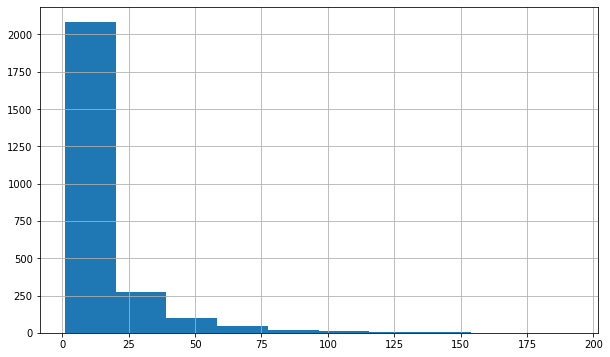

In [33]:
# Your code here
number_of_medals['Count'].hist(figsize=(10,6))
plt.show()

Based on this visualization, it doesn't make sense to use the mean for these data. It looks like there are a few years certain countries earned an unusually high number of medals. To avoid these outliers overly impacting the average, we will calculate the median instead. 

### Task 4

In the cell(s) below, using groupby to calculate the median number of medals a country earns across all years and sort in descending order to return the 5 countries with the highest median Gold Medal Count.

The dataframe should look like this:

|  | Country|Medal|Count|
|--|--------|----|-----|
|101| EUN|Gold|92.0|
|327|AFG|Gold|78.5|
|117|AHO|Gold|75.0|

In [43]:
# Your code here
median_medals = number_of_medals.groupby(['Country', 'Medal'])\
.median()\
.drop('Year', axis = 1)\
.reset_index()

median_medals[median_medals.Medal == 'Gold'].sort_values('Count', ascending=False).iloc[:5]

,Country,Medal,Count
101,EUN,Gold,92.0
327,USA,Gold,78.5
117,GDR,Gold,75.0
321,URS,Gold,68.0
259,RUS,Gold,47.0


### Task 5

Create a pivot table to identify which Athlete has the most Gold Medals. 

In [46]:
# Your code here
olympics.pivot(columns = 'Medal', values = 'Athlete').Gold.value_counts()

PHELPS, Michael           18
LEWIS, Carl                9
SPITZ, Mark                9
LATYNINA, Larisa           9
NURMI, Paavo               9
                          ..
LAGARDE, Thomas Joseph     1
ABRAHAMS, Harold           1
BEARD, Elizabeth Ann       1
SCHADE, Hartmut            1
SCHELL, Frank Reaner       1
Name: Gold, Length: 8287, dtype: int64

# Breakout Room Tasks

Below we import two datasets:
1. [Box Office Mojo](https://www.boxofficemojo.com/) Revenue Data 
    - We will save this dataset under the variable `box_office`.

2. [Imdb](https://www.imdb.com/interfaces/) title data.
    - We will save this dataset under the variable `titles`.

In [47]:
box_office_path = os.path.join(data_path, 'movie_gross.csv.gz')
box_office = pd.read_csv(box_office_path)

titles_path = os.path.join(data_path, 'imdb_titles.csv.gz')
titles = pd.read_csv(titles_path)

In [49]:
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000","652,000,000",2010
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010
3,Inception,WB,"292,600,000","535,700,000",2010
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010


In [50]:
titles.head()

,primary_title,original_title,start_year,runtime_minutes,genres
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Task 6

Identify the ten movie studios that have produced the most films without a foreign release
   - Save these names in a list called `high_domestic_release`.

In [283]:
# Your code here

### Task 7
Identify the average foriegn gross for studios with the highest domestic release. 

In [285]:
# Your code here

In [55]:
titles.primary_title.isin(box_office.title).sum()

3364

### Task 8
Merge the `box_office` and `titles` tables.

In [287]:
# Your code here

### Task 9

Calculate the average run time.

In [289]:
# Your code here

### Task 10

There are many different combinations of genres in our dataset.

Your task is to identify which 10 combinations have the highest average domestic gross.

In [292]:
# Your code here

### Task 11

Identify the 10 ***individual*** genres that appears most and that appear least across all combinations in the dataset.

In [294]:
# Your code here